In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
T = 5000
dt = 0.01
s = 10
rho = 28
b = 8/3
eps = 1.
q = 2.  # noise

In [3]:
np.random.normal(0,1,3)

array([ 0.96037343, -1.31531957, -0.87593653])

In [4]:
X1 = np.empty((T,3))
X1[0,:] = 1.0

for t in range(1,T):
    X1[t,0] = X1[t-1,0] + dt * s * (X1[t-1,1] - X1[t-1,0]) 
    X1[t,1] = X1[t-1,1] + dt * (X1[t-1,0]*(rho - X1[t-1,2]) - X1[t-1,1])
    X1[t,2] = X1[t-1,2] + dt * (X1[t-1,0]*X1[t-1,1] - b*X1[t-1,2])
    
    # Noise
    X1[t,:] += np.sqrt(q)* np.random.normal(0,1,3)*np.sqrt(dt)

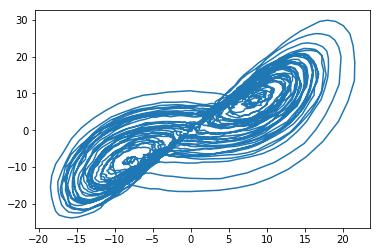

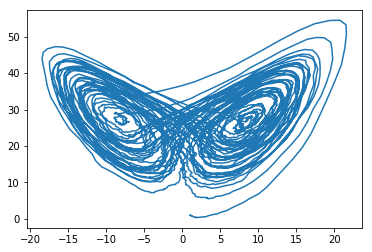

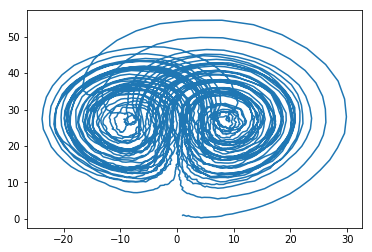

In [5]:
plt.plot(X1[:,0], X1[:,1])
plt.show()
plt.plot(X1[:,0], X1[:,2])
plt.show()
plt.plot(X1[:,1], X1[:,2])
plt.show()

In [6]:
X2 = np.empty((T,3))
X2[0,:] = 10.0

for t in range(1,T):
    X2[t,0] = X2[t-1,0] + dt * ( s * (X2[t-1,1] - X2[t-1,0]) - eps*(X1[t-1,0] - X2[t-1,0]))
    X2[t,1] = X2[t-1,1] + dt * (X2[t-1,0]*(rho - X2[t-1,2]) - X2[t-1,1])
    X2[t,2] = X2[t-1,2] + dt * (X2[t-1,0]*X2[t-1,1] - b*X2[t-1,2])
    
    # Noise
    X2[t,:] += np.sqrt(q)* np.random.normal(0,1,3)*np.sqrt(dt)

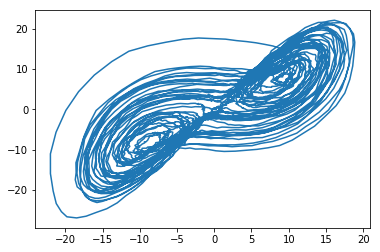

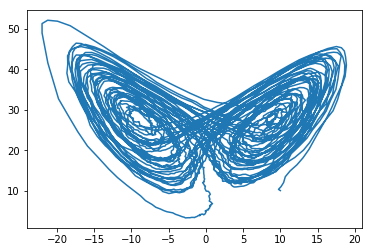

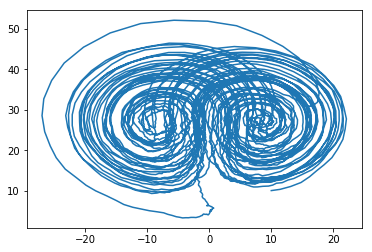

In [7]:
plt.plot(X2[:,0], X2[:,1])
plt.show()
plt.plot(X2[:,0], X2[:,2])
plt.show()
plt.plot(X2[:,1], X2[:,2])
plt.show()

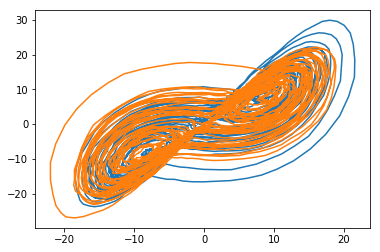

In [8]:
plt.plot(X1[:,0], X1[:,1])

plt.plot(X2[:,0], X2[:,1])
plt.show()

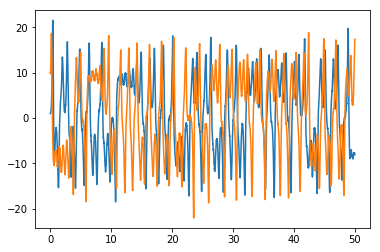

In [9]:
plt.plot(np.arange(T)*dt, X1[:,0])
plt.plot(np.arange(T)*dt, X2[:,0])
plt.show()

In [10]:
Data = np.empty((T,6))
Data[:,:3] = X1
Data[:, 3:] = X2
print(Data)


[[ 1.          1.          1.         10.         10.         10.        ]
 [ 1.04806474  1.06864606  1.07695751  9.75063129 11.42071329 10.30629179]
 [ 1.0337565   1.17659806  1.0700192  10.10383487 13.10056596 11.00261761]
 ...
 [-7.77452384 -8.72734459 25.90529949 17.02142594 17.17808309 33.86380004]
 [-7.95937628 -8.85516233 26.08968437 17.18355859 15.75271664 35.73362851]
 [-8.02867893 -8.82713614 26.09815125 17.38486582 14.34891874 37.48073296]]


In [11]:
np.save("CoupledLorenz_dt"+str(dt),
       Data)

In [12]:
Loading = np.load("CoupledLorenz_dt0.01.npy")

In [13]:
Loading[:,1] == X1[:,1]

array([ True,  True,  True, ...,  True,  True,  True])